<a href="https://colab.research.google.com/github/kuxx12257/deep_learning_cookbook/blob/main/co2ems_linreg_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import matplotlib.patches as mpatches


In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2026-02-07 15:46:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2026-02-07 15:46:02 (2.42 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df=pd.read_csv("FuelConsumption.csv")


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
train_x=np.asanyarray(df["ENGINESIZE"])
train_y=np.asanyarray(df["CO2EMISSIONS"])

In [6]:
#MAKING ANY RANDOM LINE
a=tf.Variable(20.0, dtype=tf.float32)
b=tf.Variable(30.2, dtype=tf.float32)

def line(x):
  y=a*x+b
  return y

In [7]:
#the loss function

def loss(y,train_y):
  l=tf.reduce_mean(tf.square(y-train_y))
  return l

In [8]:
learning_rate=0.01
loss_arr=[]
a_val=[]
b_val=[]
train_data=[]

epochno=200

# Store initial values of a and b before training starts


for i in range(epochno):
  with tf.GradientTape() as tp:
    y_pred = line(train_x)
    loss_val = loss(y_pred, train_y)
    loss_arr.append(loss_val.numpy())

  # Calculate gradients
  gradients = tp.gradient(loss_val, [b, a])

  a_val.append(a.numpy())
  b_val.append(b.numpy())

  # Apply gradients (simple gradient descent)
  if gradients[0] is not None:
    b.assign_sub(gradients[0] * learning_rate)
  if gradients[1] is not None:
    a.assign_sub(gradients[1] * learning_rate)

  # Store values for analysis

  if epochno % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

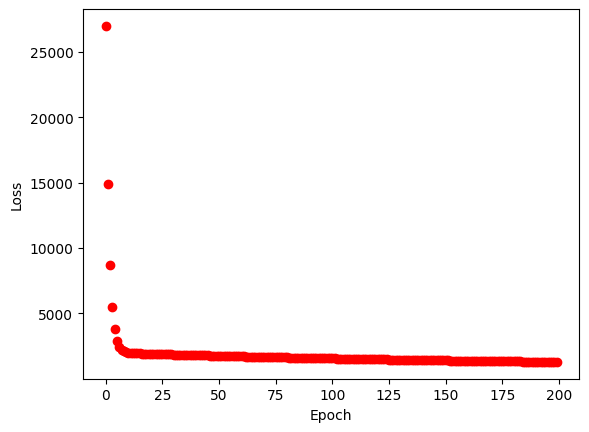

In [10]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_arr, 'ro')

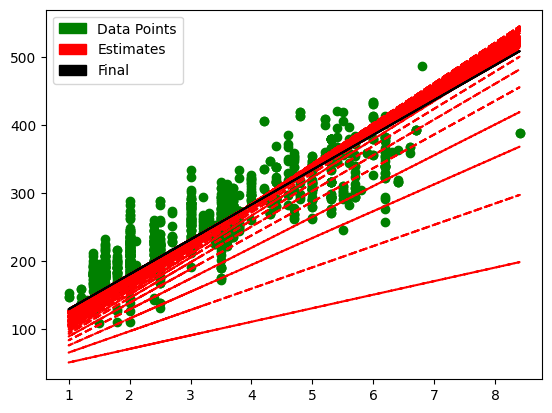

In [12]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_val[0:len(a_val)], b_val[0:len(b_val)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_val[-1]*train_x+b_val[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()